# 2019-nCoV Data Analysis SEIR

## SEIR
### 符号说明
- $S$ usceptible 易感者: 感染后变为 $E$ 或 $I$
- $E$ xposed 潜伏者
- $I$ nfected 感染者
- $R$ ecovered 康复者: 康复后不会再复发
- $r$ 感染者 $I$ 每天接触的易感者数目
- $r_2$ 潜伏者 $E$ 每天接触的易感者数目
- $\beta$ 传染系数
- $\beta_2$ 潜伏者将易感者转化为潜伏者的概率
- $\gamma$ 恢复系数, $\frac{1}{\gamma}$ 表示恢复需要的天数, 如果需要5天恢复, $\gamma$就是0.1
- $\alpha$ 潜伏者的发病概率, $\frac{1}{\alpha}$ 表示潜伏的天数, 如果潜伏5天, $\alpha$就是0.1
### 假设
- 不考虑自然出生率, 自然死亡率
- 康复之后不会再被感染

### 微分方程式
- $\frac{dS}{dt} = -\frac{r\beta SI}{N} -\frac{r_2\beta_2 SE}{N}$,  $\frac{I}{N}$表示普通人中是已感染者的概率
- $\frac{dE}{dt} = \frac{r\beta SI}{N} + \frac{r_2\beta_2 SE}{N} - \alpha E$,  $\alpha E$表示感染后直接就发病的人数
- $\frac{dI}{dt} = \alpha E - \gamma I$
- $\frac{dR}{dt} = \gamma I$
### 迭代方程
- $S_n = S_{n-1} - r\beta ...$
- $I_n = I_{n-1} + \alpha $

In [1]:
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import pylab

In [2]:
# 计算SEIR的值
def calc(T):
    for i in range(0, len(T) - 1):
        S.append(S[i] - r * beta * S[i] * I[i] / N - r2 * beta2 * S[i] * E[i] / N)
        E.append(E[i] + r * beta * S[i] * I[i] / N + r2 * beta2 * S[i] * E[i] / N - alpha * E[i] )
        I.append(I[i] + alpha * E[i] - gamma * I[i]) # 计算累计确诊人数
        R.append(R[i] + gamma * I[i])

# 画图
def plot(T, S, E, I, R):
    plt.figure()
    plt.title("SEIR-Time Curve of Virus Transmission")
    plt.plot(T, S,color='r',label='Susceptible')
    plt.plot(T, E, color='k', label='Exposed')
    plt.plot(T, I, color='b', label='Infected')
    plt.plot(T, R, color='g', label='Recovered')
    
    plt.grid(False)
    plt.legend()
    plt.xlabel("Time(day)")
    plt.ylabel("Population")
    plt.show()

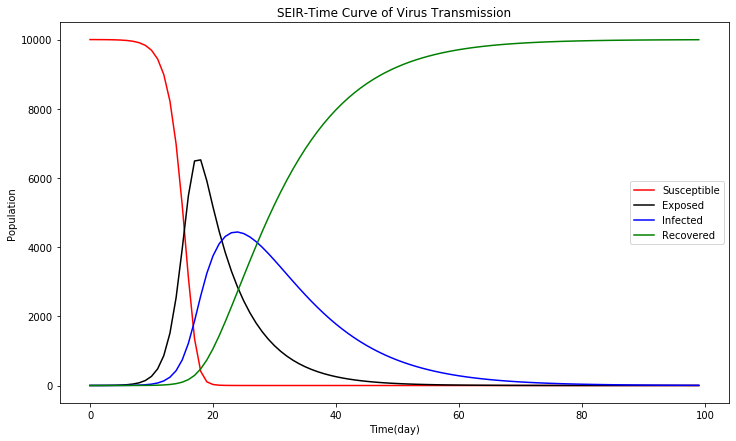

In [3]:
S, E, I, R = [], [], [], []
N = 10000 # 人口总数
I.append(1)
S.append(N - I[0])
E.append(0)
R.append(0)
r = 20 # 传染者接触人数
r2 = 30
beta = 0.03 # 传染者传染概率
beta2 = 0.03 # 易感染者被潜伏者感染的概率
alpha = 0.14 # 潜伏者患病概率 1/7
gamma = 0.1 # 康复概率

pylab.rcParams['figure.figsize'] = (12.0, 7.0)
T = [i for i in range(0, 100)]
calc(T)
plot(T,S,E,I,R)

这个模型是比较理想化的
很多人为的因素并没有考虑进来, 比如政策导致人们外出减少, $r$, $r2$应该随时间会变小, 

本来想用SEIR模型来进行预测, 但这个是个迭代方程, numpy中用的都是矩阵运算, 所以改用logistic方程

## Reference List
- 毕导的视频
- 妈咪说的视频